

```
*   Operadores Morfológicos são um tipo de Kernel utilizados para obter diversos
para obter diversos tipos de efeito na imagem, como reduzir ruído.

*   Alguns operadores são excelentes em reduzir pontos pretos em um fundo
branco e vice-versa.

*   Certos operadores podem criar efeitos de erosão e dilatação em uma imagem.
```



#Importações

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Preparação e Criações:

##Preparação

In [62]:
#Função para plotar as imagens:
def display_img(imagem):
  fig=plt.figure(figsize=(8,6))
  ax = fig.add_subplot(111)
  ax.imshow(imagem,cmap='gray')



```
Para facilitar evitar toda hora ficar se repetindo, como serão plotadas algumas
imagens, então é mais facil definir uma função para o caso.
```



In [63]:
#Função que cria  uma imagem cheia de zeros:
def load_img():
  img = np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img, text='Ola!',org=(100,350),
              fontFace=font,fontScale=5,
              color=(255,255,255),thickness=26)
  return img



```
A ideia aqui é "desenhar" numa imagem
```



##Mostrando a imagem criada("desenhada")

In [64]:
#Carregando a imagem:
img = load_img()

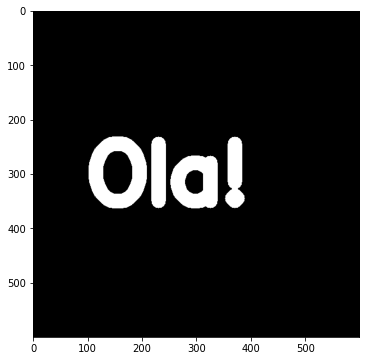

In [65]:
#Mostrando a imagem:
display_img(img)



```
Note que, se jogar uma função dentro da outra também, simplifica tudo em uma
unica linha de código, ficando assim, algo mais enxuto.
```



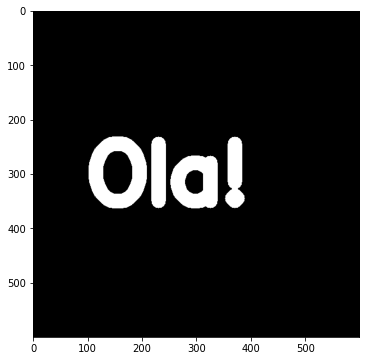

In [66]:
#Mostrando a imagem:
display_img(load_img())



```
OBS:
Faz-se necessário no caso, a criação da imagem, porque essa variável img será
utilizada no método erode.
```



##Criações:

###Kernel

In [67]:
#Criando o Kernel
Kernel = np.ones((5,5),dtype=np.uint8)
Kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)



```
Note que isso, nada mais é do que uma matriz de elementos 1. As vezes se
mistura muitas nomenclaturas, mas o resultado não é nada além do que já fora
visto.
```



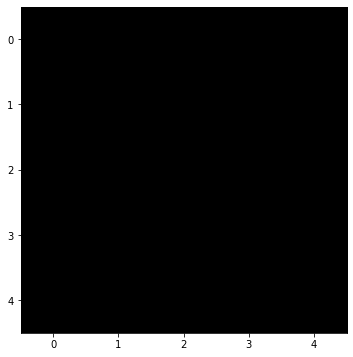

In [68]:
display_img(Kernel)

###White Noise

In [69]:
w_noise = np.random.randint(low=0,high=2,size=(600,600))
w_noise

array([[1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1]])

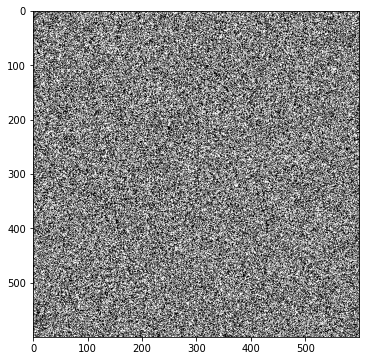

In [70]:
display_img(w_noise)



```
O professor fez um macete para transformar o array do white noise de 1 para 255
que eu não entendi muito bem o motivo, então só vou reproduzir...

Provavelmente ele fez isso, para ficar igual a imagem do "ola!" criada anteiormente.
```



In [71]:
#Convertando o array:
w_noise = w_noise*255
w_noise

array([[255, 255,   0, ..., 255, 255,   0],
       [  0,   0, 255, ..., 255,   0, 255],
       [255,   0,   0, ...,   0,   0,   0],
       ...,
       [255,   0, 255, ...,   0, 255, 255],
       [  0, 255, 255, ...,   0, 255,   0],
       [255,   0, 255, ..., 255,   0, 255]])

###Criando imagem com ruído

In [72]:
img_ruido = w_noise+img

In [73]:
img_ruido

array([[255., 255.,   0., ..., 255., 255.,   0.],
       [  0.,   0., 255., ..., 255.,   0., 255.],
       [255.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [255.,   0., 255., ...,   0., 255., 255.],
       [  0., 255., 255., ...,   0., 255.,   0.],
       [255.,   0., 255., ..., 255.,   0., 255.]])

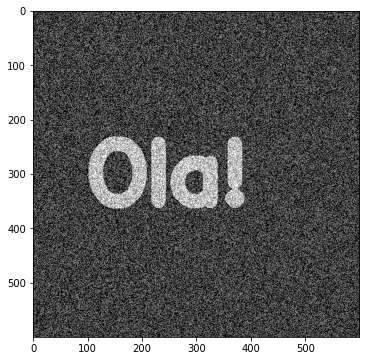

In [74]:
 display_img(img_ruido)

#Operações Morfológicas



```
Note que todos as Operações Moforlógicas possuem o parâmetro "iterations",
iterações. Quanto mais iterações houverem, mais dramática será a alteração
da imagem.
```



##Método Erode

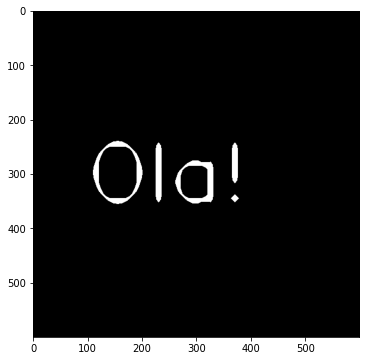

In [75]:
#Criando a imagem erodida:
img_erode = cv2.erode(img,Kernel,iterations=4)
display_img(img_erode)

##Método Dilate

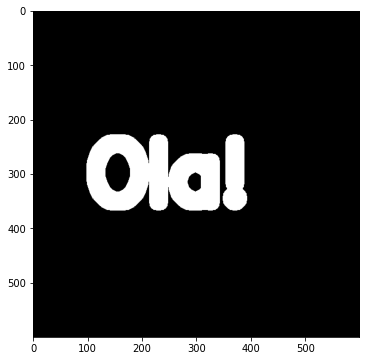

In [76]:
#Criando a imagem erodida:
img_dilate = cv2.dilate(img,Kernel,iterations=2)
display_img(img_dilate)

###Morphology

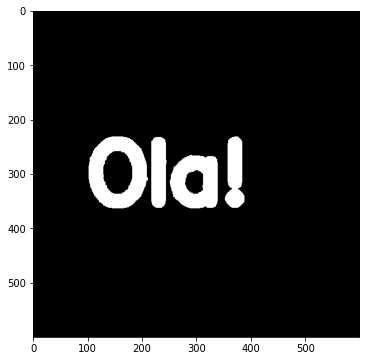

In [77]:
opening = cv2.morphologyEx(img_ruido,cv2.MORPH_OPEN,Kernel)
display_img(opening)